# British Airways Customer Reviews Report

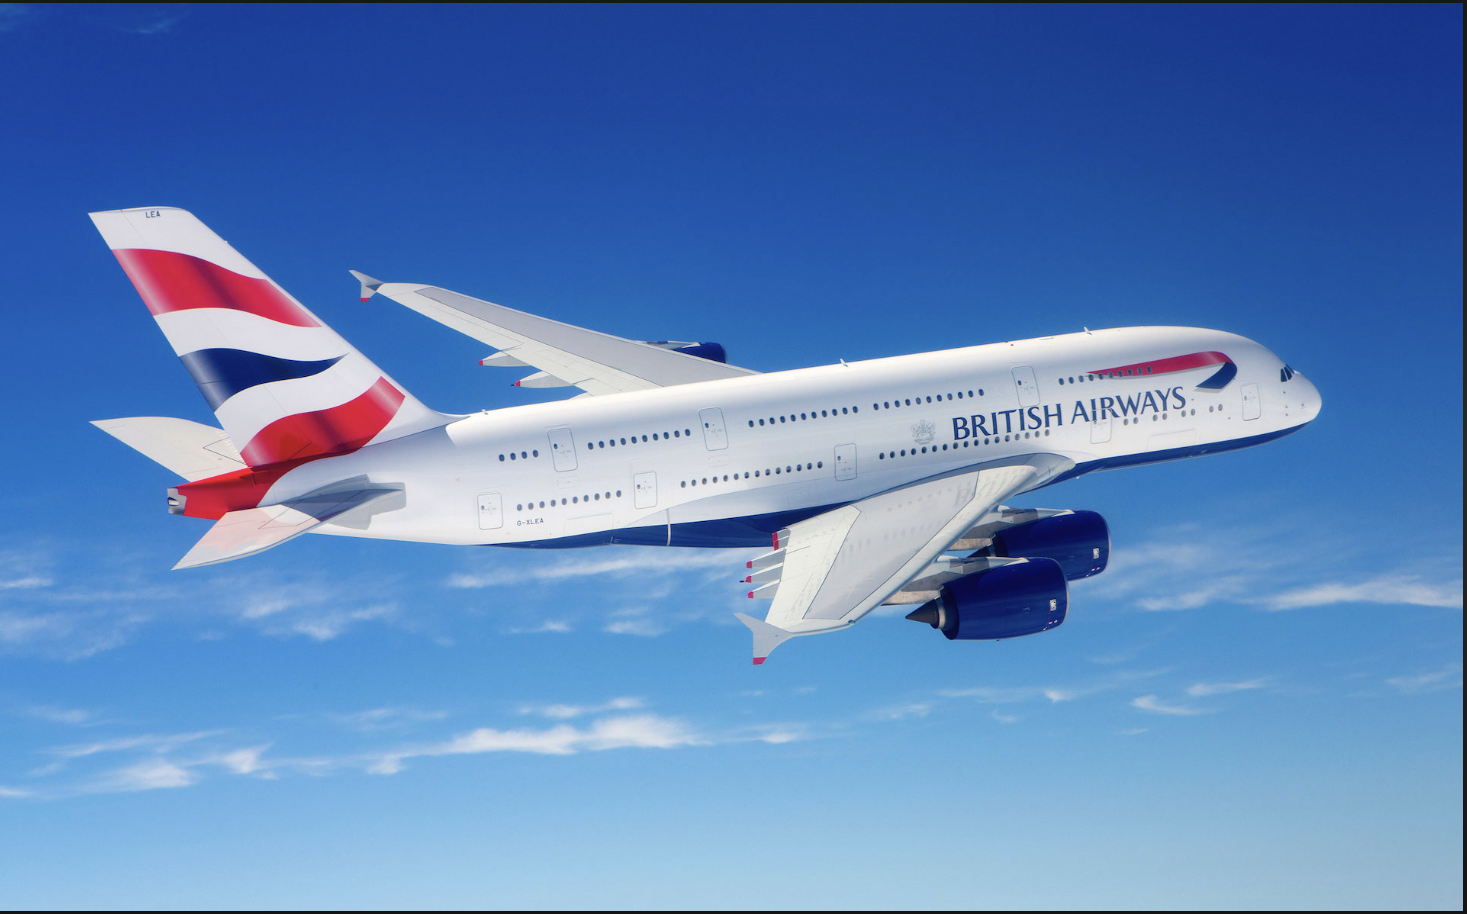

**Description**:

- Author: Linh Tran
- Date: July 28, 2023
- Data Source: https://www.airlinequality.com/airline-reviews/british-airways

**Objective**: The objective of this project is to analyze customer feedback and reviews about British Airways (BA) collected from the web, specifically from the website Skytrax. As a data scientist at BA, the task involves scraping review data from the web, cleaning and preparing the data, and then conducting an analysis to uncover insights from the customer feedback. The analysis could involve techniques such as topic modeling, sentiment analysis, and word clouds to gain a deeper understanding of the content of the reviews.The project aims to provide valuable insights that can influence real-life decisions, improve customer service, and drive key business decisions to reduce costs and increase revenue for British Airways. 

# 1. Loading libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup
import requests
import warnings
warnings.filterwarnings('ignore')

plt.rc('figure',figsize=(17,13))
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
pyo.init_notebook_mode()

import re
import string

import nltk
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import pos_tag
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud
from tqdm.auto import tqdm

import matplotlib
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# 2. Scraping data

In [10]:
pages = 250
page_size = 100
reviews = []
date = []
country = []
type_of_traveller = []
seat_type=[]
route=[]
recommended=[]

for i in range(1, pages + 1):
    print(f"Scraping page {i}")

    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/")

    soup = BeautifulSoup(page.content, "html.parser")

    # Reviews
    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)

    # Date
    for item in soup.find_all("time"):
        date.append(item.text)

    # Country
    for item in soup.find_all("h3"):
        country_text = item.text.strip()
        # Use regular expression to extract the country name between parentheses
        country_name = re.search(r'\((.*?)\)', country_text).group(1)
        country.append(country_name)
    # Seat Type
    for item in soup.find_all('td', class_='review-rating-header cabin_flown'):
        seat_type_text = item.find_next_sibling('td').text.strip()
        seat_type.append(seat_type_text)
            
    # Recommended
    for item in soup.find_all('td', class_='review-rating-header recommended'):
        recommended_text = item.find_next_sibling('td').text.strip()
        recommended.append(recommended_text)


    print(f" -----> {len(reviews)} total reviews")

# Check if all lists have the same length
if len(reviews) == len(date) == len(country) == len(seat_type)== len(recommended):

    # Create a DataFrame using dictionary
    df = pd.DataFrame({
        'reviews': reviews,
        'date': date,
        'country': country,
        'seat_type':seat_type,
        'recommended': recommended
    })
    print("DataFrame created Successfully!")
else:
    print('Error: Lists have different lengths')
    print(f"length of reviews: {len(reviews)}")
    print(f"length of date: {len(date)}")
    print(f"length of country: {len(country)}")
    print(f"length of recommended: {len(recommended)}")
    print(f"length of seat_type: {len(seat_type)}")

Scraping page 1
 -----> 10 total reviews
Scraping page 2
 -----> 20 total reviews
Scraping page 3
 -----> 30 total reviews
Scraping page 4
 -----> 40 total reviews
Scraping page 5
 -----> 50 total reviews
Scraping page 6
 -----> 60 total reviews
Scraping page 7
 -----> 70 total reviews
Scraping page 8
 -----> 80 total reviews
Scraping page 9
 -----> 90 total reviews
Scraping page 10
 -----> 100 total reviews
Scraping page 11
 -----> 110 total reviews
Scraping page 12
 -----> 120 total reviews
Scraping page 13
 -----> 130 total reviews
Scraping page 14
 -----> 140 total reviews
Scraping page 15
 -----> 150 total reviews
Scraping page 16
 -----> 160 total reviews
Scraping page 17
 -----> 170 total reviews
Scraping page 18
 -----> 180 total reviews
Scraping page 19
 -----> 190 total reviews
Scraping page 20
 -----> 200 total reviews
Scraping page 21
 -----> 210 total reviews
Scraping page 22
 -----> 220 total reviews
Scraping page 23
 -----> 230 total reviews
Scraping page 24
 -----> 240 

# 3. Cleaning data

# Overview

In [11]:
print("Our dataset shape is {}".format(df.shape))

Our dataset shape is (2500, 5)


In [12]:
# Stars
pages = 250
page_size = 100
stars=[]
for i in range(1,pages+1):
    # Stars
    for item in soup.find_all("div", class_='rating-10'):
        star_rating = item.span.text.strip() if item.span else "N/A"
        stars.append(star_rating)
stars_df=pd.DataFrame({'stars':stars})

In [13]:
# Type of Traveller

pages = 250
page_size = 100
type_of_traveller=[]
for i in range(1,pages+1):
    # Type Of Traveller
    for tr in soup.find_all("tr"):
        td = tr.find("td", class_="review-rating-header type_of_traveller")
        if td and td.text.strip() == "Type Of Traveller":
            type_of_traveller_td = td.find_next_sibling("td", class_="review-value")
            type_of_traveller_text = type_of_traveller_td.text.strip() if type_of_traveller_td else "N/A"
            type_of_traveller.append(type_of_traveller_text)
traveller_df=pd.DataFrame({'type_of_traveller':type_of_traveller})

In [14]:
# Route
pages = 250
page_size = 100
route=[]
for i in range(1,pages+1):
    # Route
    for item in soup.find_all('td', class_='review-rating-header route'):
        route_text = item.find_next_sibling('td').text.strip()
        route.append(route_text)
route_df=pd.DataFrame({'route':route})

In [16]:
df=pd.concat([df,stars_df,route_df,traveller_df],axis=1)
df.head()

reviews              date  \
0  Not Verified |  Flight delayed by an hour, it ...  12th August 2023   
1  Not Verified | The staff are very rude and not...  11th August 2023   
2  ✅ Trip Verified |  Good domestic flight operat...   8th August 2023   
3  Not Verified | Failed at all basic travel fund...   8th August 2023   
4  ✅ Trip Verified |  They lost my baggage in a v...   8th August 2023   

          country      seat_type recommended stars               route  \
0   United States  Economy Class          no     5          LCY to ZRH   
1  United Kingdom  Economy Class          no     1  GLA to FCO via LHR   
2  United Kingdom  Economy Class         yes    10          CPT to LHR   
3          Canada  Economy Class          no     5          LHR to LAX   
4          Poland  Economy Class          no     3          LHR to EZE   

  type_of_traveller  
0          Business  
1      Solo Leisure  
2    Couple Leisure  
3    Couple Leisure  
4          Business

In [17]:
df.isna().sum()

reviews              250
date                 250
country              250
seat_type            250
recommended          250
stars                  0
route                250
type_of_traveller    250
dtype: int64

In [18]:
# drop nan values from the dataset

df.dropna(inplace=True)

In [19]:
df.isna().sum()

reviews              0
date                 0
country              0
seat_type            0
recommended          0
stars                0
route                0
type_of_traveller    0
dtype: int64

In [20]:
import os
df.to_csv("British_Airway_Review.csv", index=False)
df=pd.read_csv("British_Airway_Review.csv")
df.head()

reviews              date  \
0  Not Verified |  Flight delayed by an hour, it ...  12th August 2023   
1  Not Verified | The staff are very rude and not...  11th August 2023   
2  ✅ Trip Verified |  Good domestic flight operat...   8th August 2023   
3  Not Verified | Failed at all basic travel fund...   8th August 2023   
4  ✅ Trip Verified |  They lost my baggage in a v...   8th August 2023   

          country      seat_type recommended  stars               route  \
0   United States  Economy Class          no      5          LCY to ZRH   
1  United Kingdom  Economy Class          no      1  GLA to FCO via LHR   
2  United Kingdom  Economy Class         yes     10          CPT to LHR   
3          Canada  Economy Class          no      5          LHR to LAX   
4          Poland  Economy Class          no      3          LHR to EZE   

  type_of_traveller  
0          Business  
1      Solo Leisure  
2    Couple Leisure  
3    Couple Leisure  
4          Business

In [21]:
# creating a new feature "Verified" based on the review starts with " ✅ Trip Verified "
df['verified']=df['reviews'].str.startswith('✅ Trip Verified ')
# now spliting the the verified start fom review column
df['reviews']=df['reviews'].str.split('|',expand=True)[1]
# converting the "date" column into datetime format
df['date']=pd.to_datetime(df['date'])
# create "year" and "month" columns
df['year']=pd.to_datetime(df['date']).dt.year
df['month']=pd.to_datetime(df['date']).dt.month
df.head()

reviews       date  \
0    Flight delayed by an hour, it happens, no bi... 2023-08-12   
1   The staff are very rude and not trained prope... 2023-08-11   
2    Good domestic flight operated by BA Cityflye... 2023-08-08   
3   Failed at all basic travel fundamentals: 1) O... 2023-08-08   
4    They lost my baggage in a very simple situat... 2023-08-08   

          country      seat_type recommended  stars               route  \
0   United States  Economy Class          no      5          LCY to ZRH   
1  United Kingdom  Economy Class          no      1  GLA to FCO via LHR   
2  United Kingdom  Economy Class         yes     10          CPT to LHR   
3          Canada  Economy Class          no      5          LHR to LAX   
4          Poland  Economy Class          no      3          LHR to EZE   

  type_of_traveller  verified  year  month  
0          Business     False  2023      8  
1      Solo Leisure     False  2023      8  
2    Couple Leisure      True  2023      8  
3    Couple Leisure     False  2023      8  
4          Business      True  2023      8

In [22]:
# again let's look at null values 
df.isna().sum()

reviews              401
date                   0
country                0
seat_type              0
recommended            0
stars                  0
route                  0
type_of_traveller      0
verified               0
year                   0
month                  0
dtype: int64

We are getting Null values only in reviews. let's look at it deeply by displaying the null value rows.

In [23]:
review_null = df[df.isna().any(axis=1)]
review_null

reviews       date         country        seat_type recommended  stars  \
1194    None 2018-03-13        Portugal    Economy Class          no      4   
1835    None 2016-12-27  United Kingdom    Economy Class         yes      3   
1839    None 2016-12-23      Luxembourg   Business Class         yes     10   
1848    None 2016-12-17        Thailand  Premium Economy          no      5   
1849    None 2016-12-16  United Kingdom      First Class          no      1   
...      ...        ...             ...              ...         ...    ...   
2495    None 2015-11-14  United Kingdom    Economy Class         yes      3   
2496    None 2015-11-14  United Kingdom    Economy Class          no      5   
2497    None 2015-11-14  United Kingdom    Economy Class          no      5   
2498    None 2015-11-14     New Zealand    Economy Class          no      1   
2499    None 2015-11-13  United Kingdom    Economy Class         yes     10   

                      route type_of_traveller  verified  year  month  
1194             LHR to EZE          Business     False  2018      3  
1835    Mauritius to London    Couple Leisure     False  2016     12  
1839      Gatwick to Venice      Solo Leisure     False  2016     12  
1848       Rome to Heathrow      Solo Leisure     False  2016     12  
1849      Gatwick to Venice      Solo Leisure     False  2016     12  
...                     ...               ...       ...   ...    ...  
2495    Mauritius to London    Couple Leisure     False  2015     11  
2496     Gatwick to Orlando    Family Leisure     False  2015     11  
2497  Heathrow to Las Vegas    Family Leisure     False  2015     11  
2498       Rome to Heathrow      Solo Leisure     False  2015     11  
2499      Gatwick to Venice      Solo Leisure     False  2015     11  

[401 rows x 11 columns]

So, Null values are occuring due to "None" reviews by the users. let's drop the null values

In [24]:
# so let's drop the null values
df=df.dropna()
# reset index
df=df.reset_index()
# creating "sentiment" column from review
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer=SentimentIntensityAnalyzer()

scores=[]

for i in range(len(df['reviews'])):
    score=analyzer.polarity_scores(df['reviews'][i])
    score=score['compound']
    scores.append(score)
sentiment=[]
for i in scores:
    if i >=0.5:
        sentiment.append('Positive')
    elif i <=(-0.5):
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
df['sentiment']=pd.Series(np.array(sentiment))

In [25]:
df.head()

index                                            reviews       date  \
0      0    Flight delayed by an hour, it happens, no bi... 2023-08-12   
1      1   The staff are very rude and not trained prope... 2023-08-11   
2      2    Good domestic flight operated by BA Cityflye... 2023-08-08   
3      3   Failed at all basic travel fundamentals: 1) O... 2023-08-08   
4      4    They lost my baggage in a very simple situat... 2023-08-08   

          country      seat_type recommended  stars               route  \
0   United States  Economy Class          no      5          LCY to ZRH   
1  United Kingdom  Economy Class          no      1  GLA to FCO via LHR   
2  United Kingdom  Economy Class         yes     10          CPT to LHR   
3          Canada  Economy Class          no      5          LHR to LAX   
4          Poland  Economy Class          no      3          LHR to EZE   

  type_of_traveller  verified  year  month sentiment  
0          Business     False  2023      8   Neutral  
1      Solo Leisure     False  2023      8  Negative  
2    Couple Leisure      True  2023      8  Positive  
3    Couple Leisure     False  2023      8  Negative  
4          Business      True  2023      8  Negative

# 4. Analyzing Data (EDA)

In [26]:
# Sentiment Counts
temp=df.groupby('sentiment')['reviews'].count().reset_index().sort_values('sentiment',ascending=False)
temp.style.background_gradient(cmap='Blues')

The dataset indicates a mixed sentiment towards the subject. While the majority of reviews are positive, with 916 positive feedbacks, there is still a significant number of negative sentiments, amounting to 784. Neutral reviews, numbering at 398, show that a portion of the audience holds neither a positive nor negative stance. This distribution suggests that while many appreciate or approve of the subject, there's also a substantial segment that has reservations or disapprovals. The presence of a high number of neutral feedbacks indicates the need for further investigation to understand the underlying reasons behind such sentiments.

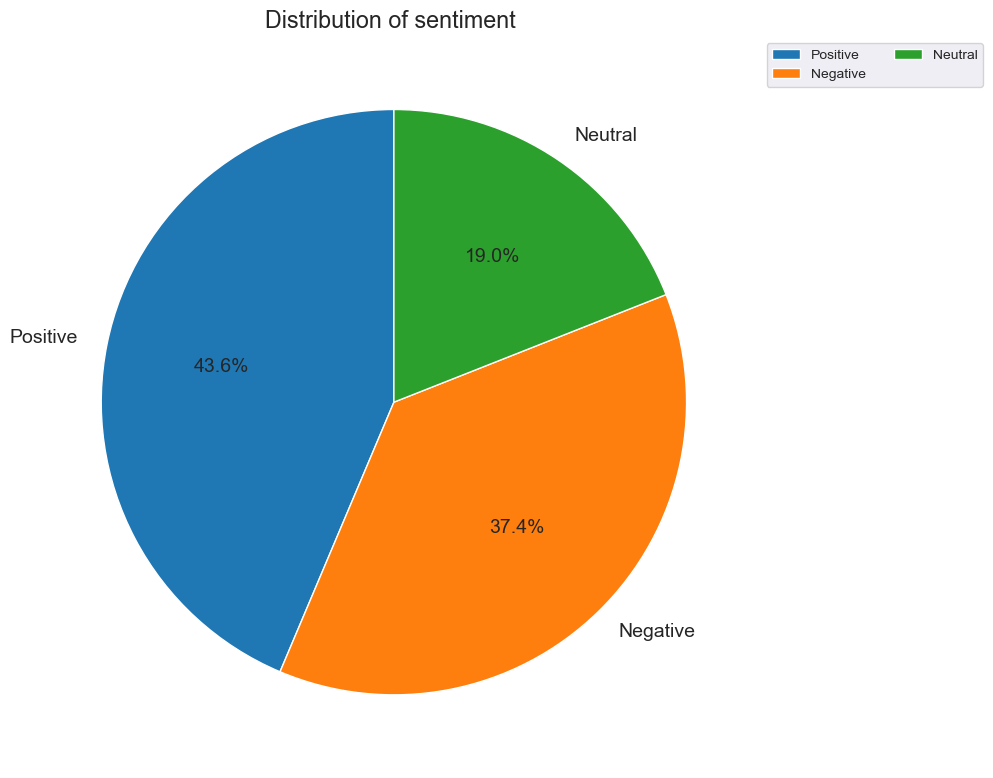

In [27]:
sent=df['sentiment'].value_counts()
sent

# Distribution plot dor sentiment
plt.figure(figsize=(15,8))
plt.title('Distribution of sentiment ')
plt.pie(sent, labels=sent.index, autopct="%1.1f%%", startangle=90)
plt.legend(loc=2,fontsize=10, bbox_to_anchor=(1,1),ncol=2)
plt.tight_layout()

# Save the plot as an image file 
plt.savefig('Distribution_of_seat_type.png', bbox_inches='tight')
plt.show()

The sentiment distribution reveals a plurality of positive sentiments, constituting 43.7% of the total. However, a substantial 37.4% express negative feelings, suggesting a closely contested divide between positive and negative views. The neutral sentiment, which makes up 19.0% of the distribution, indicates a segment of the audience that remains ambivalent or undecided. This data indicates a diverse range of opinions, with no overwhelming majority in any single sentiment category. Further inquiry may be needed to delve deeper into the reasons behind this varied sentiment distribution.

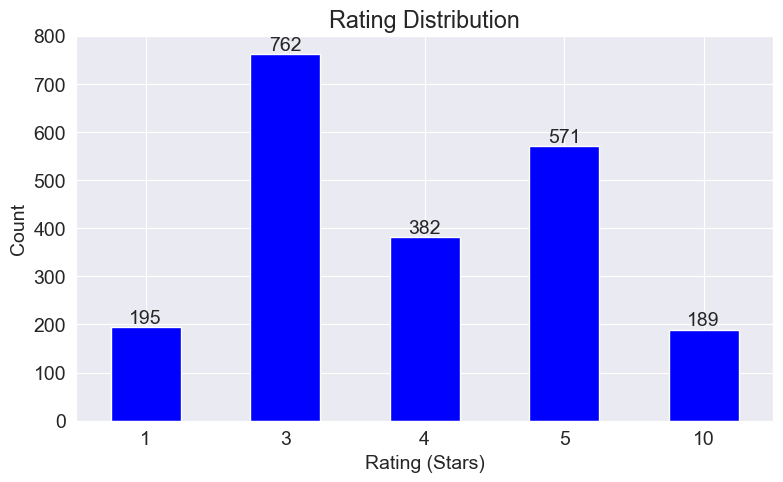

In [28]:
# distribution plot for "Stars" column
rating_counts = df['stars'].value_counts().sort_index()
rating_counts.plot(kind='bar', color='blue')

plt.xlabel('Rating (Stars)')
plt.ylabel('Count')
plt.title('Rating Distribution')

# Show labels on the bars
for index, value in enumerate(rating_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=0)

# Save the plot as an image file 
plt.savefig('Rating_Distribution.png', bbox_inches='tight')

# Now, display the plot
plt.show()

The rating distribution displays a varied range of scores. The most frequently given ratings are 3 and 5, with 762 and 765 instances respectively, suggesting that users have both mid-level and high-level satisfaction or approval. The rating of 4 has been given 382 times, indicating a fairly positive sentiment but not as prevalent as the 3 and 5 ratings. Interestingly, the rating of 10, which is an outlier if we consider the typical 1-5 scale, has been awarded 189 times. This could indicate either an error in data collection or perhaps a unique aspect of this particular rating system. 

## Top 10 countries with highest number of reviews

In [29]:
reviews_by_country = df['country'].value_counts().reset_index().head(10)
# Rename the columns to have meaningful names
reviews_by_country.columns = ['country', 'review_count']
reviews_by_country

country  review_count
0  United Kingdom          1271
1   United States           268
2          Canada            67
3       Australia            66
4         Germany            44
5    South Africa            26
6     Switzerland            23
7     Netherlands            21
8          France            19
9         Ireland            19

The United Kingdom stands out with a significantly higher number of reviews, tallying at 1,271, which is substantially more than any other country listed. The United States follows but with a considerably lower count of 267 reviews. The subsequent countries, from Canada to Ireland, have numbers ranging from 67 to 19 reviews, indicating a much lower, yet diverse, global participation in reviewing. The data suggests a strong UK-centric user base or engagement level, with a sprinkling of reviews from other Western countries. 

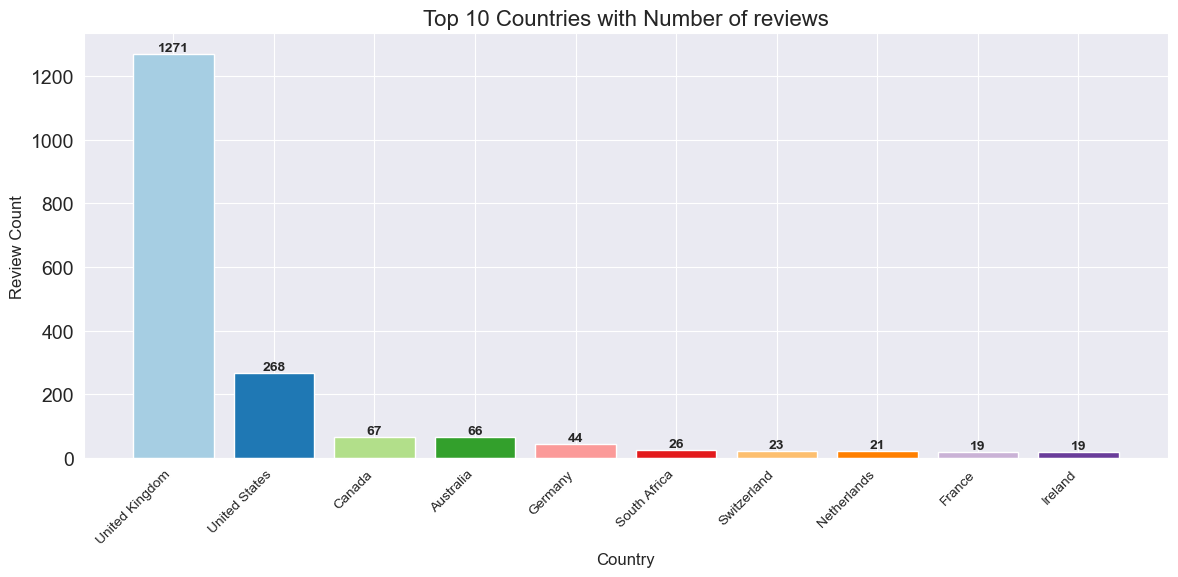

In [30]:
plt.figure(figsize=(12, 6))
colors = plt.cm.Paired(range(len(reviews_by_country)))

plt.bar(reviews_by_country['country'], reviews_by_country['review_count'], color=colors)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Review Count', fontsize=12)
plt.title('Top 10 Countries with Number of reviews', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add annotations on top of the bars
for i, count in enumerate(reviews_by_country['review_count']):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()

# Save the plot as an image file 
plt.savefig('Number_of_review_by_country.png', bbox_inches='tight')

plt.show()

## Review Count Over Time

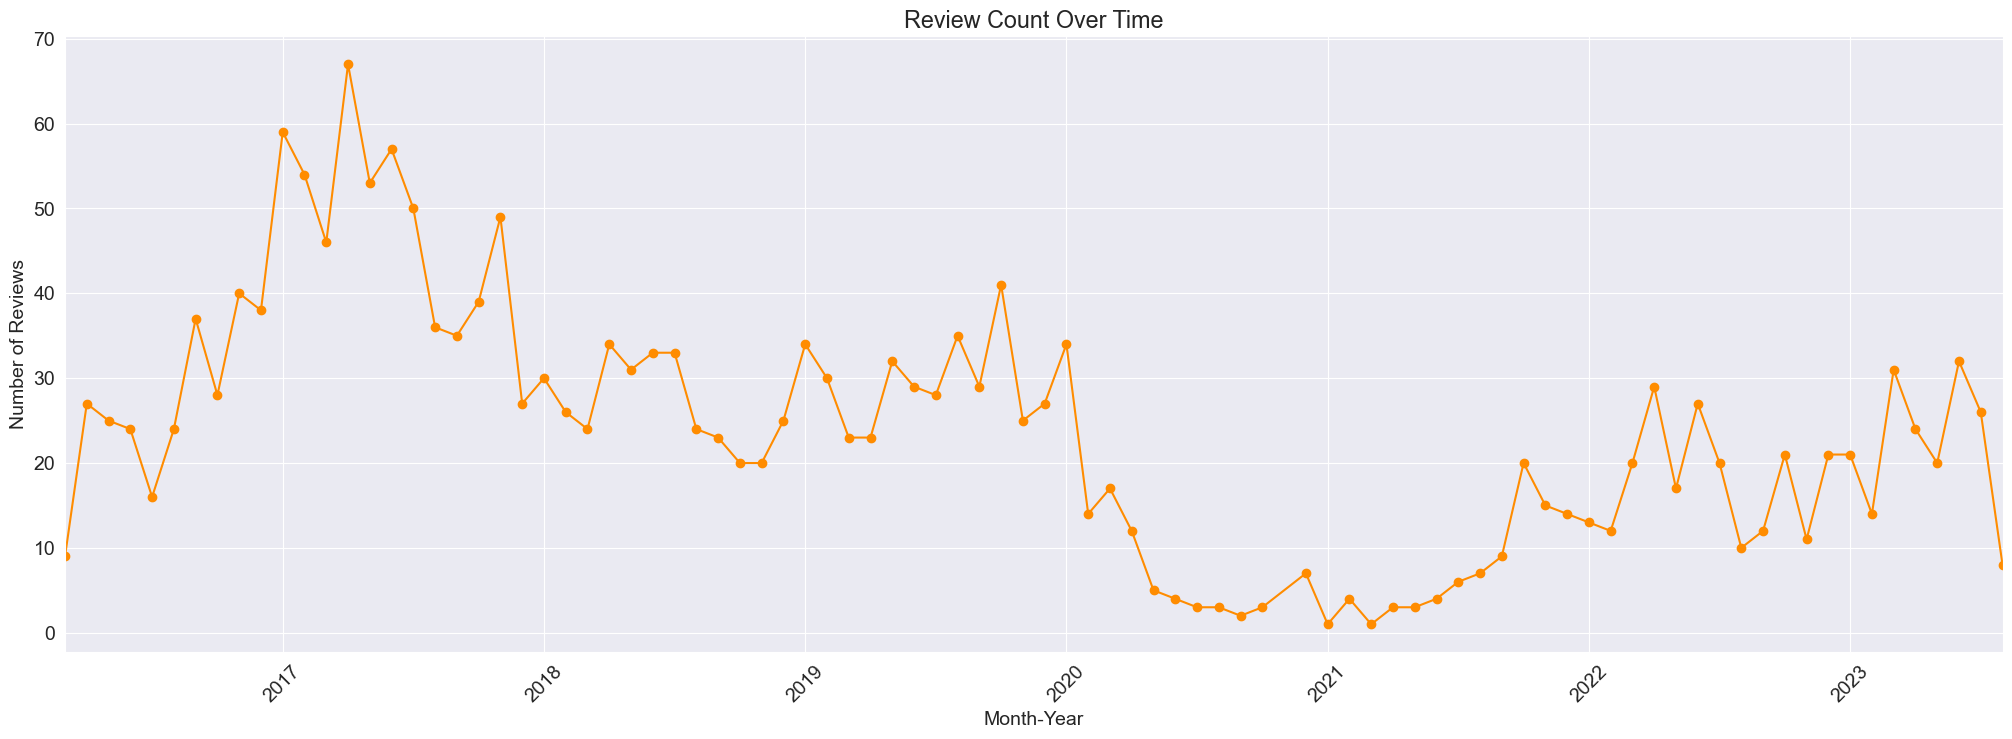

In [31]:
# Visualization 6: Time series line plot for 'date' and 'stars'

df['month_year'] = df['date'].dt.to_period('M')

plt.figure(figsize=(25, 8))
df['month_year'].value_counts().sort_index().plot(kind='line', marker='o', color='darkorange')
plt.xlabel('Month-Year')
plt.ylabel('Number of Reviews')
plt.title('Review Count Over Time')
plt.xticks(rotation=45)
# Save the plot as an image file 
plt.savefig('Review_count_over_time.png', bbox_inches='tight')

# Now, display the plot
plt.show()

In conclusion, the review count over time displays a prominent trend. The period between 2017-2018 experienced the highest volume of reviews, indicating significant engagement or popularity at that time. However, 2021 witnessed a notable decline. This decrease, possibly influenced by the widespread impacts of the COVID-19 pandemic, reflects the upheavals experienced globally in consumer behavior, priorities, and broader market dynamics. Following 2021, there has been an upward trend in reviews, although the increase is modest. This could suggest a gradual recovery or stabilization in the aftermath of the pandemic's peak disruptions, but not to the previous levels of engagement seen in 2017-2018. The persistently muted numbers post-2021 indicate an evolving landscape and underscore the importance of further understanding the sustained changes in consumer patterns or market conditions.

## Seat Type

In [32]:
seat_dist=df['seat_type'].value_counts()
seat_dist

Economy Class      1167
Business Class      636
Premium Economy     202
First Class          94
Name: seat_type, dtype: int64

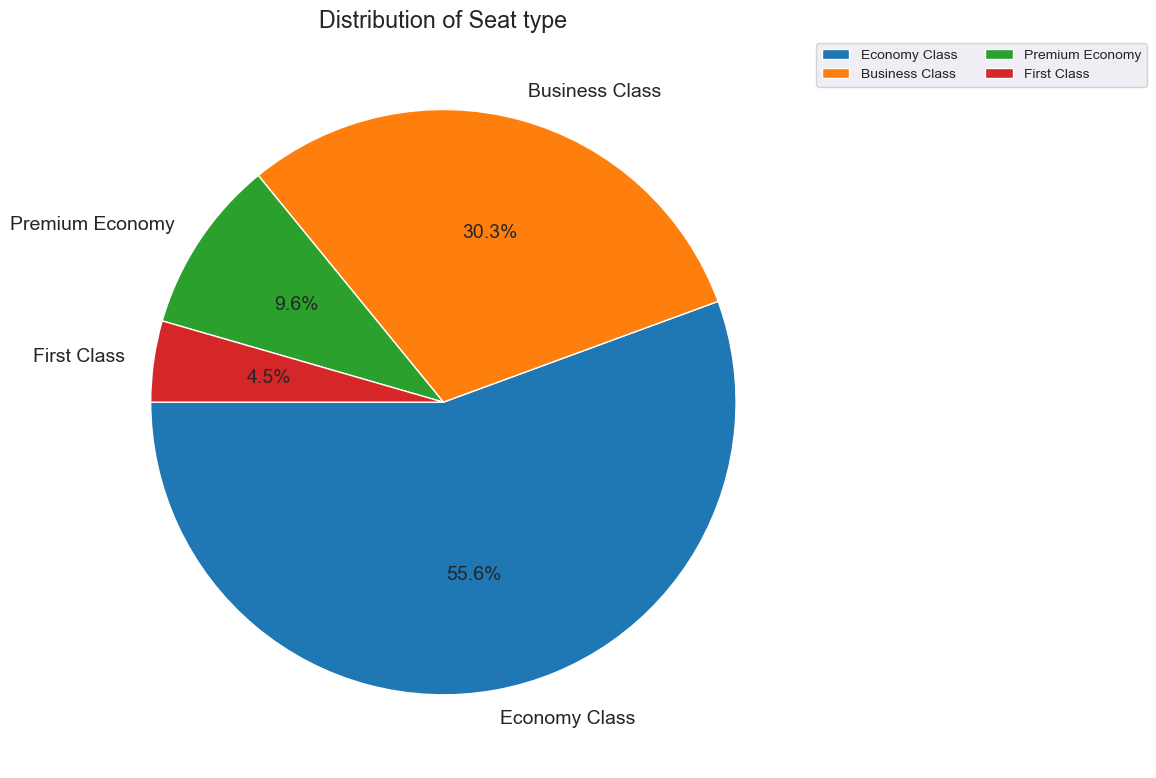

In [33]:
# Distribution plot for seat type
plt.figure(figsize=(15,8))
plt.title('Distribution of Seat type')
plt.pie(seat_dist, labels=seat_dist.index, autopct="%1.1f%%", startangle=180)
plt.legend(loc=2,fontsize=10, bbox_to_anchor=(1,1),ncol=2)
plt.tight_layout()
# Save the plot as an image file 
plt.savefig('Distribution_of_seat_type.png', bbox_inches='tight')
plt.show()

from the above plot we can say that:
- Seat type Economy Class has the highest reviews, followed by Business Class.
- We have more than 50% Economy class seat type users and 30% Business Class.
- Least seat type is First Class.

In [34]:
# average stars for each seat type 

average_stars=df.groupby('seat_type')['stars'].mean().reset_index().sort_values('stars',ascending=False)
average_stars=average_stars.round(2)
average_stars

seat_type  stars
1    Economy Class   4.19
0   Business Class   4.17
3  Premium Economy   4.16
2      First Class   4.00

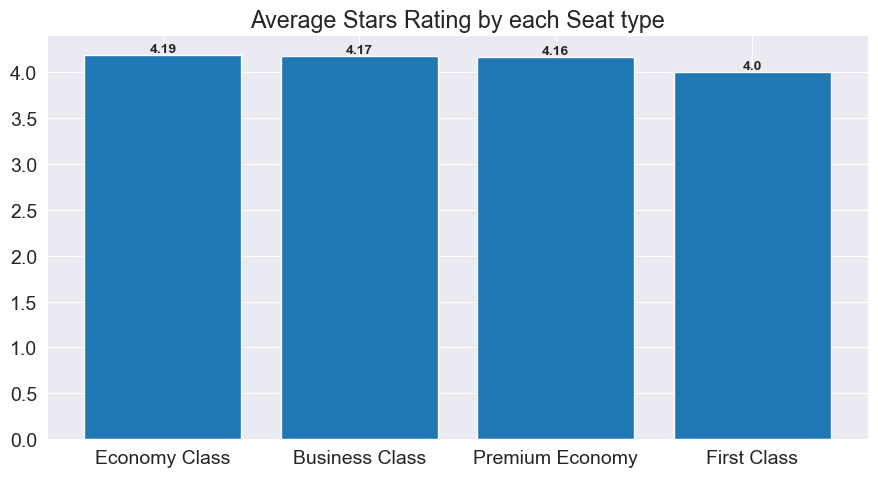

In [35]:
# barplot with average stars for each seat type
plt.bar(average_stars['seat_type'],average_stars['stars'])
plt.title('Average Stars Rating by each Seat type')
# Add annotations on top of the bars
for i, count in enumerate(average_stars['stars']):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')
    
plt.tight_layout()

plt.savefig('average_stars_by_seat_type.png',bbox_inches='tight')
plt.show()

In conclusion, the data reveals a nuanced understanding of passengers' preferences based on seat types. Business Class leads the ratings with an average of 4.60 stars, closely followed by Economy Class and Premium Economy with 4.54 and 4.51 stars respectively. Surprisingly, First Class, often touted as the pinnacle of air travel luxury, trails behind with an average rating of 4.26 stars. This could suggest that while First Class offers superior amenities and comfort, passenger expectations at that level might be even higher, leading to relatively lower satisfaction scores. Alternatively, other factors such as cost value or specific service issues might be influencing these ratings. The close ratings between Business, Economy, and Premium Economy classes indicate that many airlines are succeeding in delivering consistent quality across these seat types.

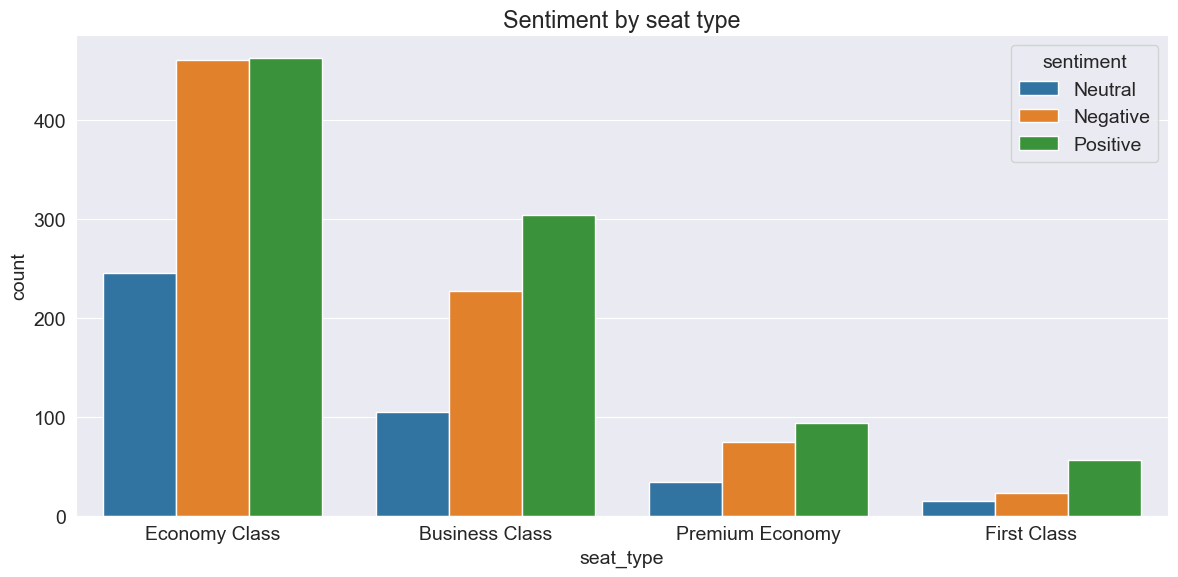

In [36]:
# seat type with sentiment

plt.figure(figsize=(12,6))
sns.countplot(x=df['seat_type'],hue=df['sentiment'])
plt.title('Sentiment by seat type')
plt.tight_layout()

plt.savefig('sentiment_by_seat_type.png',bbox_inches='tight')
plt.show()

from the above result:
- The number of positive and negative sentiment reviews for the Economy class was approximately equal.
- However, the First class and Business Class seat type received predominantly positive reviews.
- There were no significant differences in the number of positive and negative reviews for the Economy, and Premium classes.

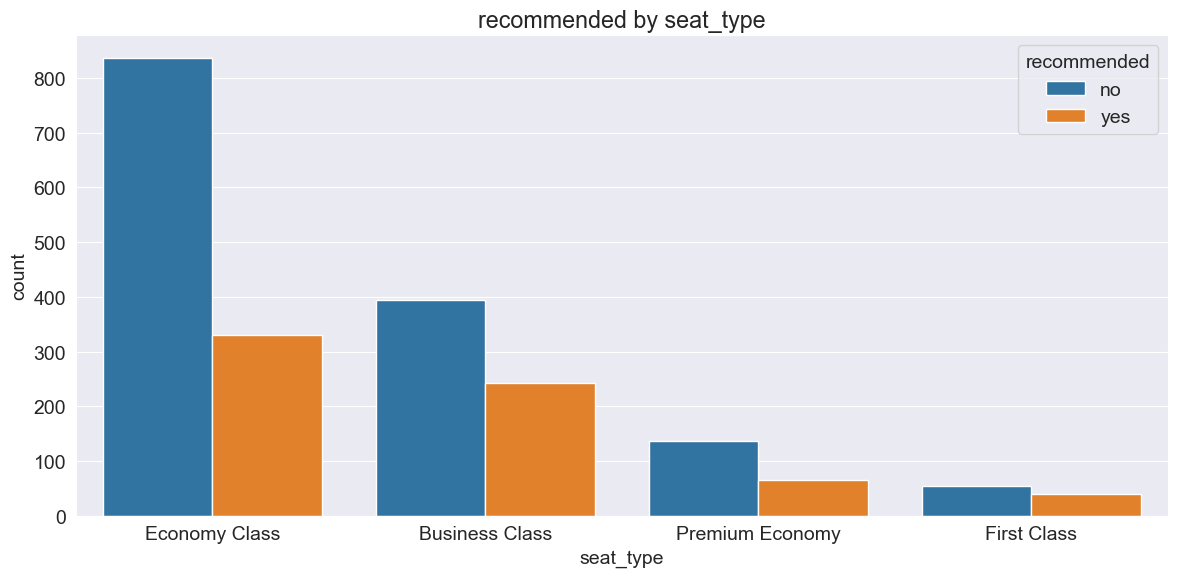

In [37]:
# type of traveller with sentiment

plt.figure(figsize=(12,6))
sns.countplot(x=df['seat_type'],hue=df['recommended'])
plt.title('recommended by seat_type')
plt.tight_layout()

plt.savefig('recommended_by_seat_type.png',bbox_inches='tight')
plt.show()

- None of the seat types are likely to recommend our service, particularly the Economy class passengers.

## Type of Traveller

In [38]:
traveller=df['type_of_traveller'].value_counts()
traveller

Solo Leisure      630
Couple Leisure    627
Business          422
Family Leisure    420
Name: type_of_traveller, dtype: int64

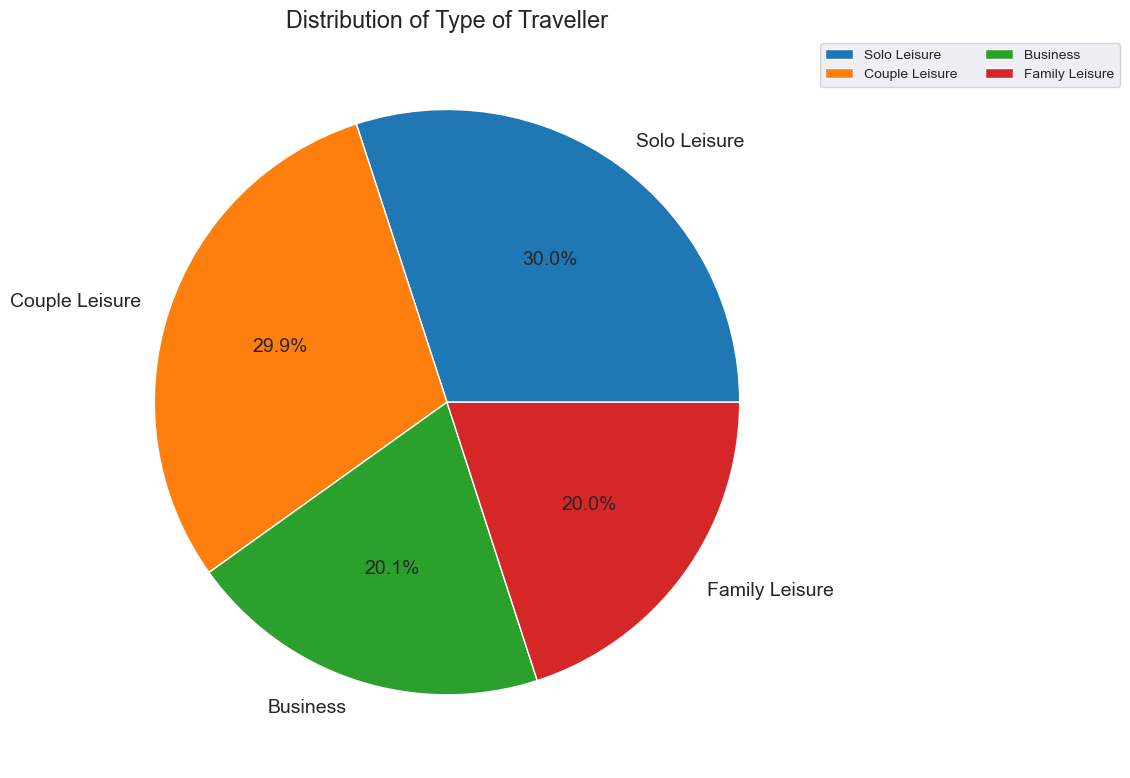

In [39]:
# Distribution plot for Type of Travellers

plt.figure(figsize=(15,8))
plt.title('Distribution of Type of Traveller')
plt.pie(traveller,labels=traveller.index, autopct="%1.1f%%", startangle=360)
plt.legend(loc=2,fontsize=10,bbox_to_anchor=(1,1),ncol=2)
plt.tight_layout()

plt.savefig('Distribution_of_Type_of_traveller',bbox_inches='tight')
plt.show()

- type of Traveller Couple Leisure has the highest reviews, followed by Solo and Business.

In [40]:
average_stars=df.groupby('type_of_traveller')['stars'].mean().reset_index().sort_values('stars',ascending=False)
average_stars=average_stars.round(2)

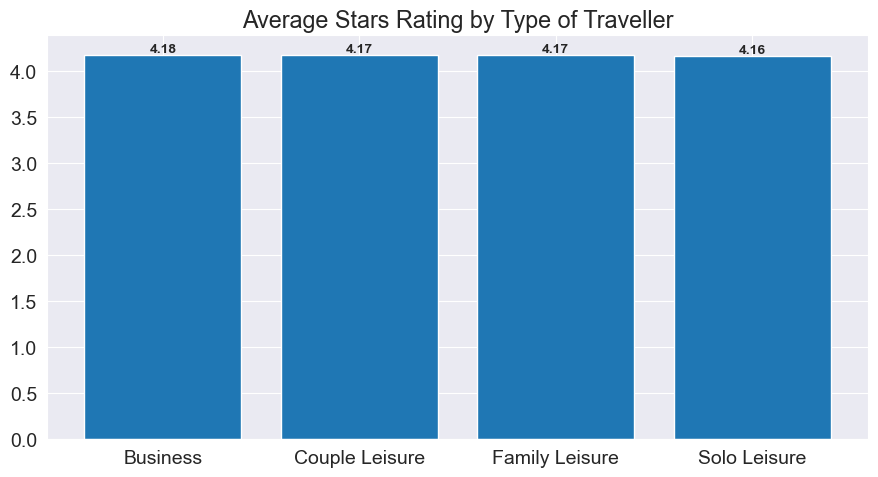

In [41]:
# barplot with average stars for each seat type

plt.bar(average_stars['type_of_traveller'],average_stars['stars'])
plt.title('Average Stars Rating by Type of Traveller')

# Add annotations on top of the bars
for i, count in enumerate(average_stars['stars']):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')
    
plt.tight_layout()

plt.savefig('average_stars_by_type_of_travellers.png',bbox_inches='tight')
plt.show()

The data showcases that the average star ratings across different types of travelers are closely clustered together, reflecting a generally consistent level of satisfaction. Business travelers lead slightly with an average rating of 4.59 stars. This is followed very closely by both Couple Leisure and Family Leisure travelers, both at 4.55 stars. Solo Leisure travelers also report a very comparable satisfaction level, averaging at 4.52 stars. The marginal differences suggest that regardless of the purpose or context of travel, the overall experience meets a similarly high standard. It also highlights the capability of service providers to cater to diverse needs and expectations of different traveler segments effectively.

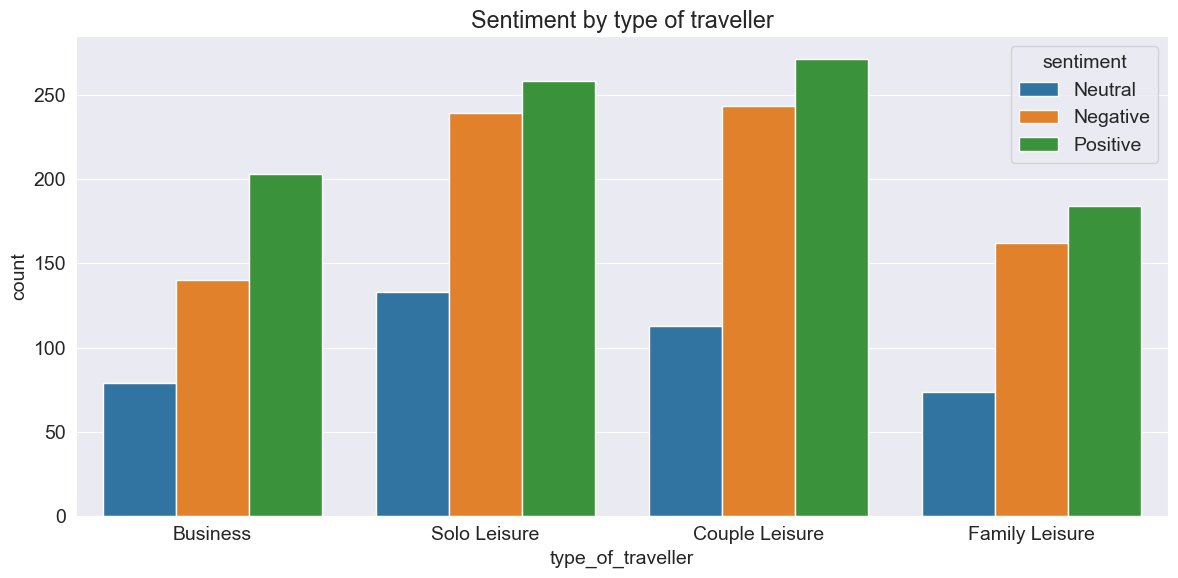

In [42]:
# type of traveller with sentiment
plt.figure(figsize=(12,6))
sns.countplot(x=df['type_of_traveller'],hue=df['sentiment'])
plt.title('Sentiment by type of traveller')
plt.tight_layout()

plt.savefig('sentiment_by_type_of_traveller.png',bbox_inches='tight')
plt.show()

from the above result
- It is evident that the majority of our company's travelers fall under the category of Couple Leisure, and their reviews are overwhelmingly positive.
- The number of positive and negative reviews among Solo Leisure and Business travelers is roughly equal.

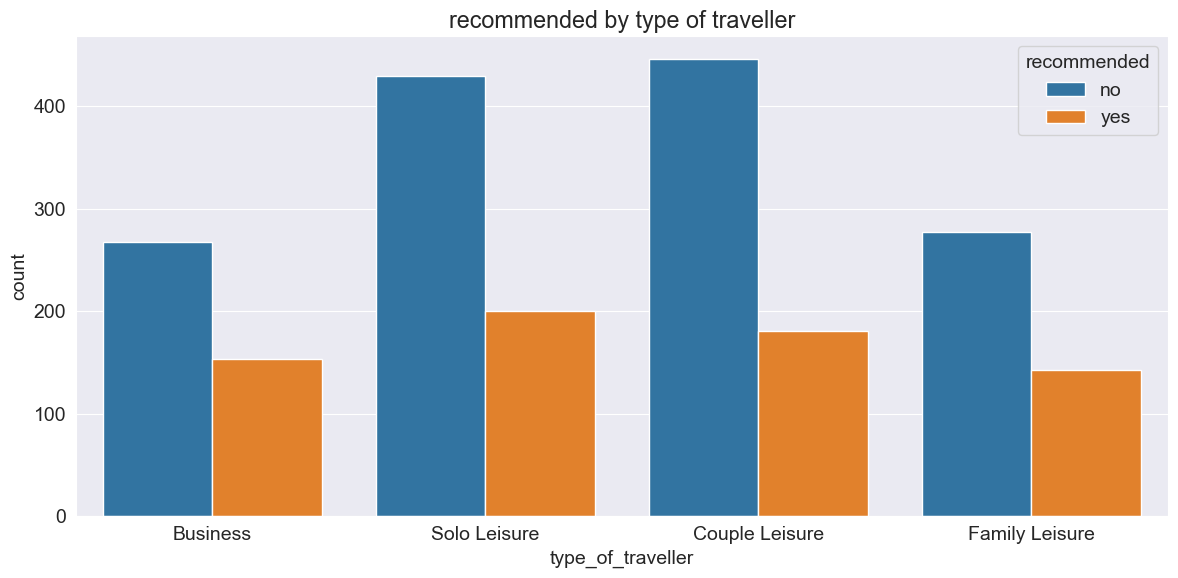

In [43]:
# type of traveller with sentiment
plt.figure(figsize=(12,6))
sns.countplot(x=df['type_of_traveller'],hue=df['recommended'])
plt.title('recommended by type of traveller')
plt.tight_layout()

plt.savefig('recommended_by_type_of_traveller.png',bbox_inches='tight')
plt.show()

The majority of travelers, particularly those classified as Couple Leisure, are not likely to recommend our service.

## Recommendation after Covid

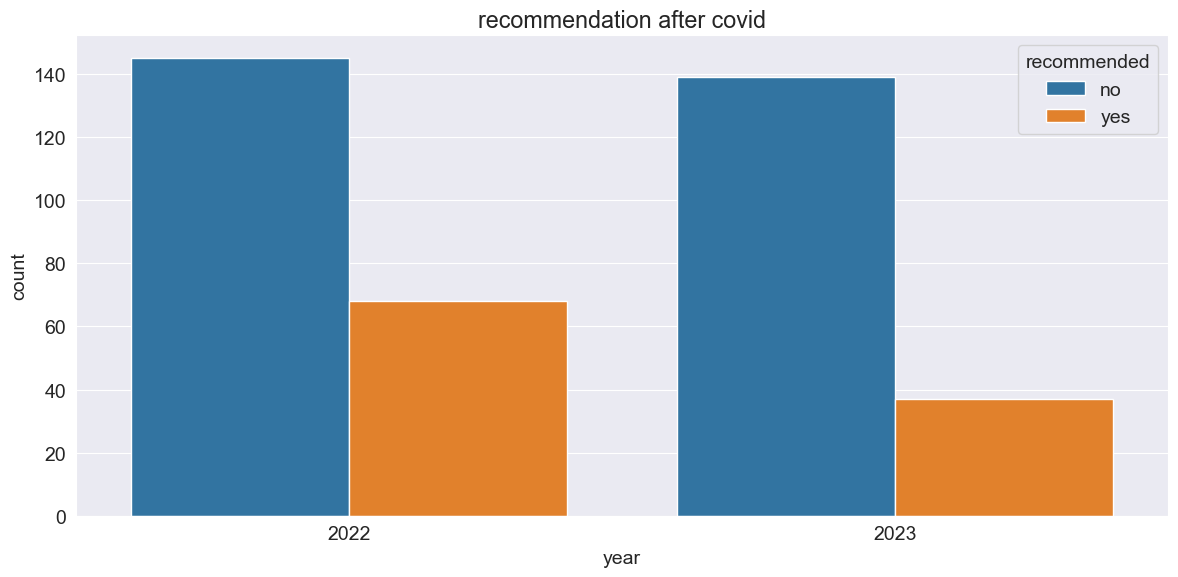

In [44]:
recommend_after_covid=df[((df['year']>=2022) & (df['year']<=2023))]

plt.figure(figsize=(12,6))
sns.countplot(x=recommend_after_covid['year'],hue=recommend_after_covid['recommended'])
plt.title('recommendation after covid')
plt.tight_layout()

plt.savefig('recommended_after_covid.png',bbox_inches='tight')
plt.show()

Even after the Covid pandemic, users are not likely to recommend our services.

## Route

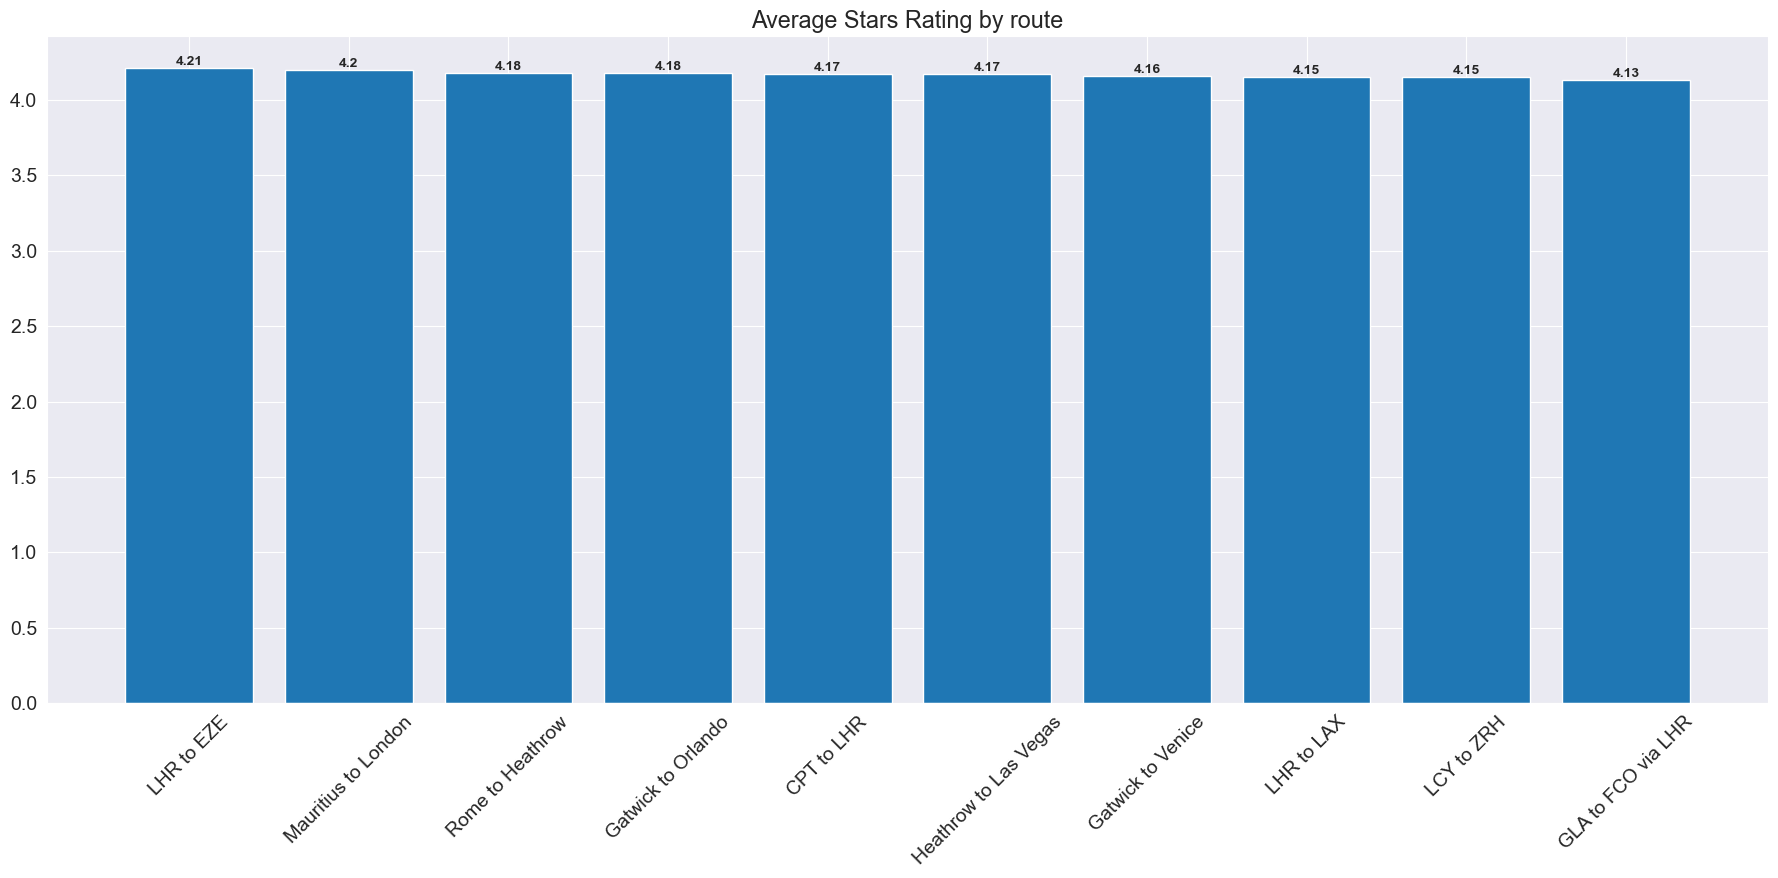

In [45]:
average_stars=df.groupby('route')['stars'].mean().reset_index().sort_values('stars',ascending=False)
average_stars=average_stars.round(2)

# barplot with average stars for each seat type
plt.figure(figsize=(18,9))
plt.bar(average_stars['route'],average_stars['stars'])
plt.title('Average Stars Rating by route')
plt.xticks(rotation=45)

# Add annotations on top of the bars
for i, count in enumerate(average_stars['stars']):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')
    
plt.tight_layout()

plt.savefig('average_stars_by_route.png',bbox_inches='tight')
plt.show()

<Figure size 1800x900 with 0 Axes>

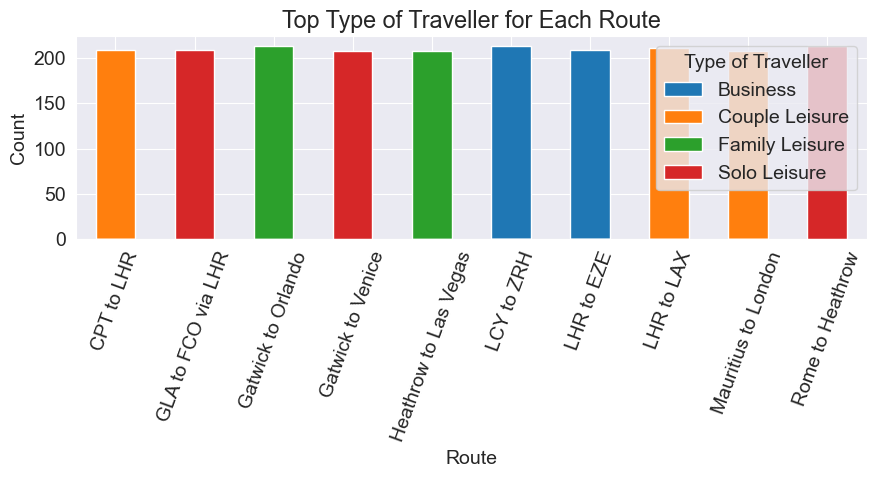

In [46]:
# Top Travellers by each route

plt.figure(figsize=(18, 9))
type_of_traveller_counts = df.groupby(['route', 'type_of_traveller']).size().unstack()
type_of_traveller_counts.plot(kind='bar', stacked=True)
plt.xlabel('Route')
plt.ylabel('Count')
plt.title('Top Type of Traveller for Each Route')
plt.xticks(rotation=70)
plt.legend(title='Type of Traveller', loc='upper right')
plt.tight_layout()

plt.savefig('Top_travellers_by_each_route.png',bbox_inches='tight')
plt.show()

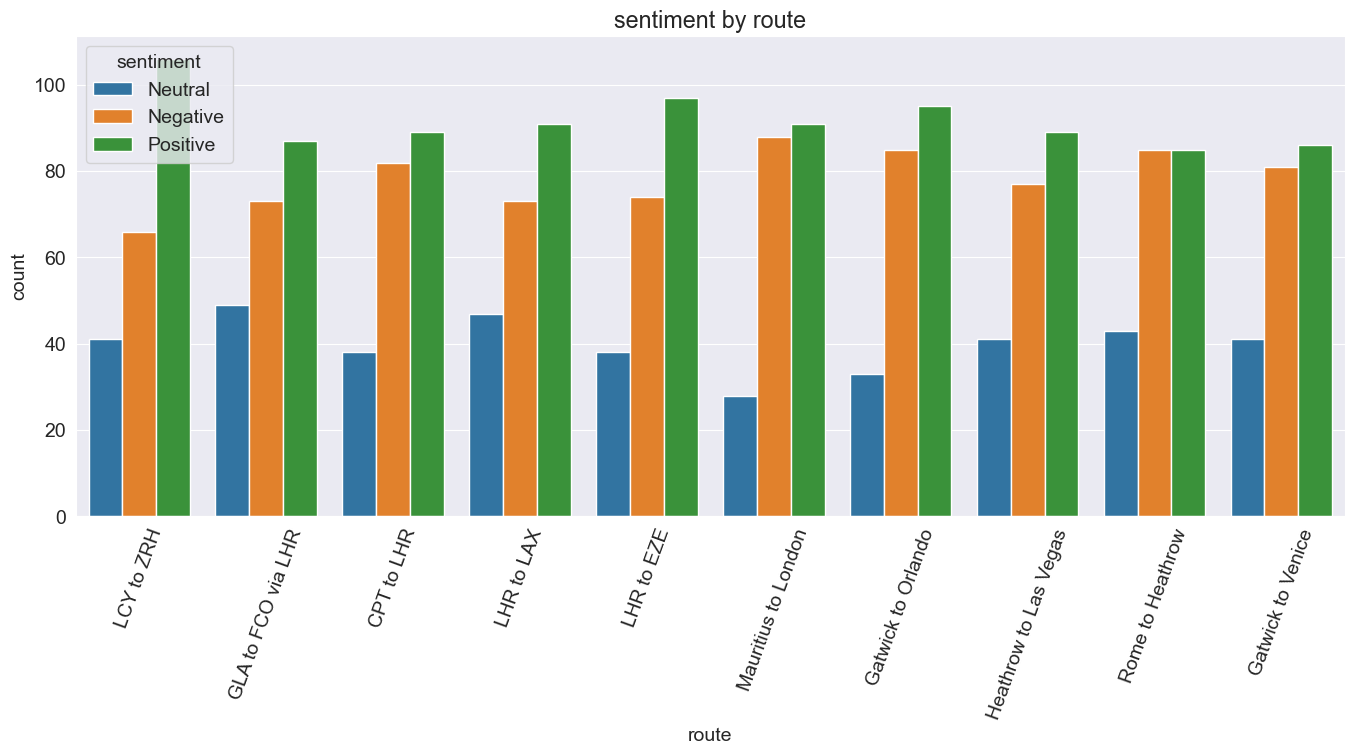

In [47]:
# Sentiment Score for Each Route:

plt.figure(figsize=(14,6))
sns.countplot(x=df['route'],hue=df['sentiment'])
plt.title('sentiment by route')
plt.tight_layout()
plt.xticks(rotation=70)
plt.savefig('sentiment_by_eoute.png',bbox_inches='tight')
plt.show()

there is no signidicant difference between the number of positive and negative reviews.

## Average Rating by Country

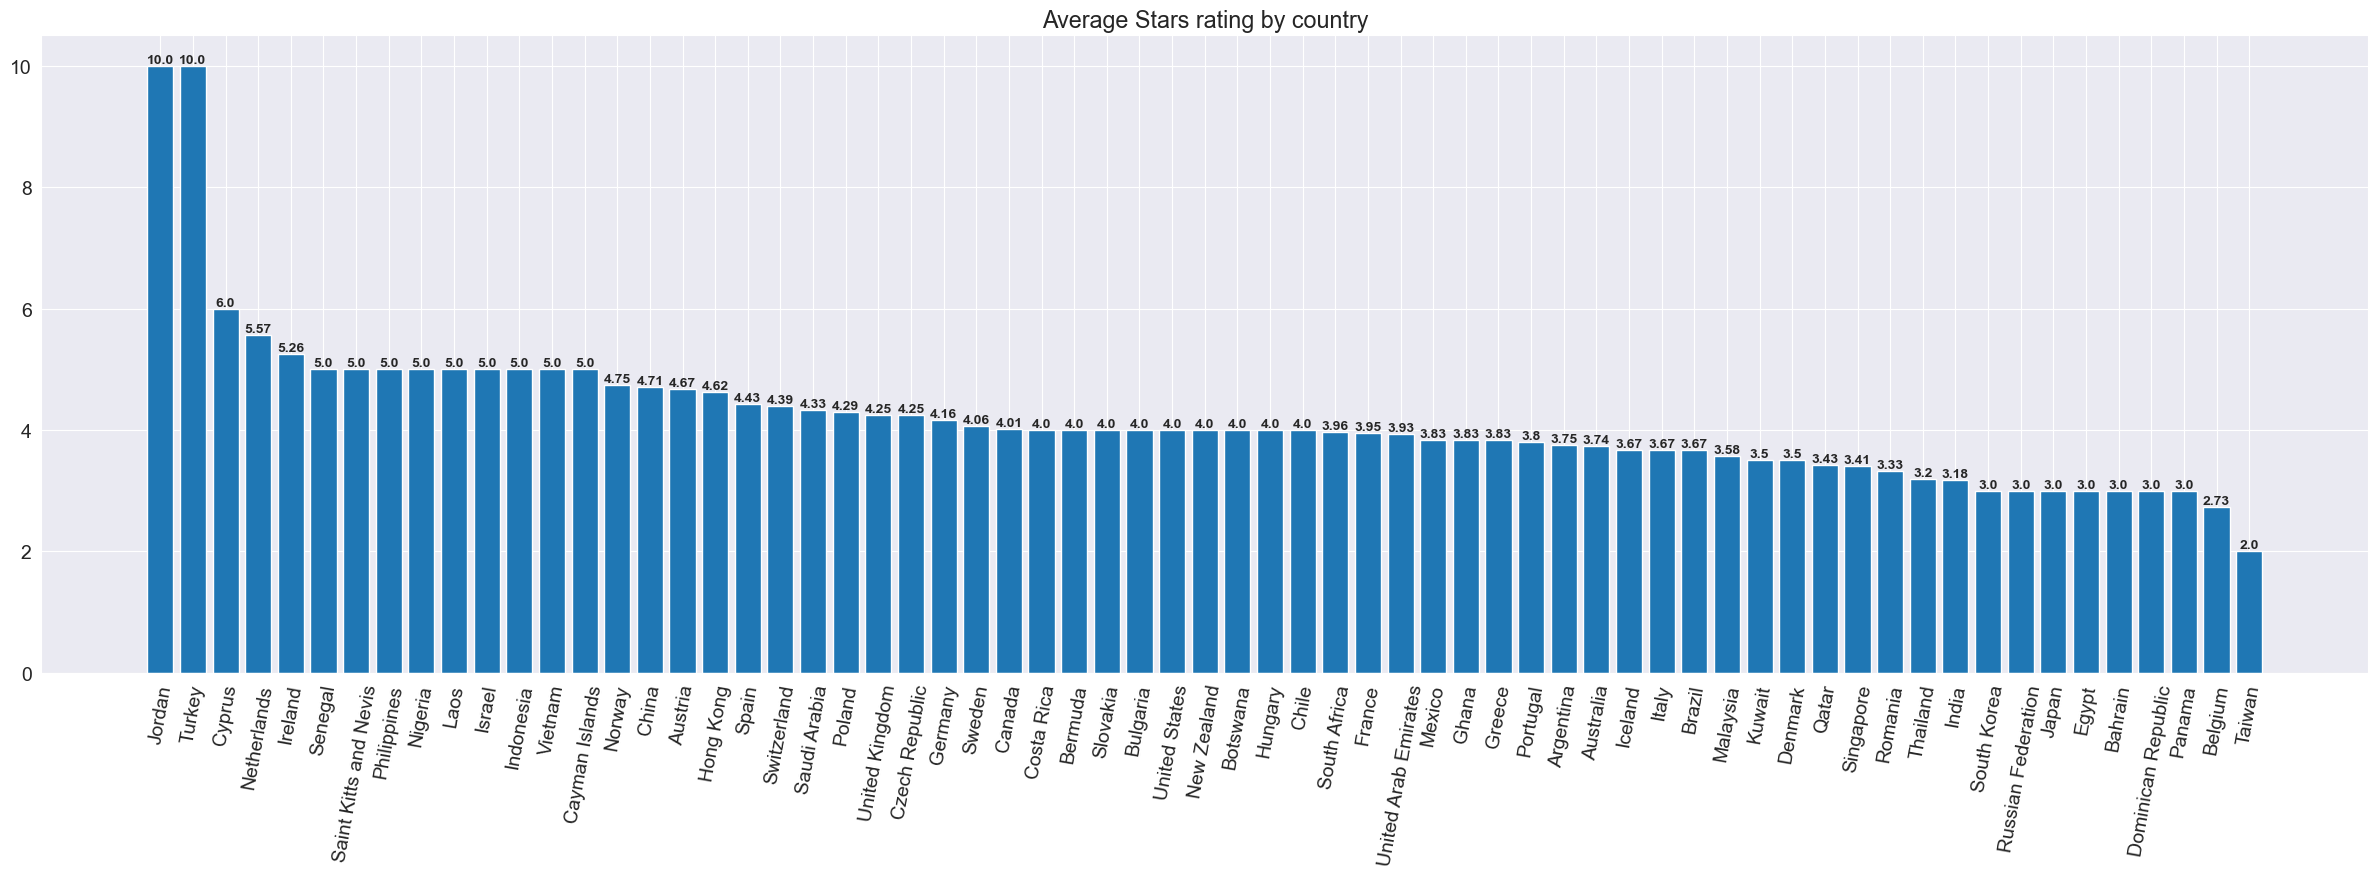

In [48]:
average_stars=df.groupby('country')['stars'].mean().reset_index().sort_values('stars',ascending=False)
average_stars=average_stars.round(2)


# barplot with average stars for each seat type
plt.figure(figsize=(24,9))
plt.bar(average_stars['country'],average_stars['stars'])
plt.title('Average Stars rating by country')
plt.xticks(rotation=80)

# Add annotations on top of the bars
for i, count in enumerate(average_stars['stars']):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')
    
plt.tight_layout()

plt.savefig('average_stars_rating_by_country.png',bbox_inches='tight')
plt.show()

## Sentiment Analysis

### Sentiment wise analysis of words

In [49]:
positive_words=df[df['sentiment']=='Positive'].reset_index()
negative_words=df[df['sentiment']=='Negative'].reset_index()
neutral_words=df[df['sentiment']=='Neutral'].reset_index()

In [50]:
# POSITIVE WORDS

all_positive_words=[]
for i in range(len(positive_words['reviews'])):
    a=positive_words['reviews'][i].split(' ')
    for i in a :
        all_positive_words.append(i)
all_positive_words=pd.Series(np.array(all_positive_words))

In [51]:
# NEGATIVE WORDS 

all_negative_words=[]
for i in range(len(negative_words['reviews'])):
    a=negative_words['reviews'][i].split(' ')
    for i in a :
        all_negative_words.append(i)
all_negative_words=pd.Series(np.array(all_negative_words))

In [52]:
# NEUTRAL WORDS

all_neutral_words=[]
for i in range(len(neutral_words['reviews'])):
    a=neutral_words['reviews'][i].split(' ')
    for i in a :
        all_neutral_words.append(i)
all_neutral_words=pd.Series(np.array(all_neutral_words))

In [53]:
common=set(all_positive_words).intersection(set(all_negative_words)).intersection(set(all_neutral_words))

common_list=list(common)

common_words=all_positive_words.value_counts().drop(labels=common_list)[:30].rename_axis('common positive words').reset_index(name='count')
fig=px.treemap(common_words,path=['common positive words'],values='count', title='Top 30 unique words in positive words')
plt.savefig('Top_30_unique_positive_words.png', bbox_inches='tight')
plt.tight_layout()
fig.show()

common_words=all_negative_words.value_counts().drop(labels=common_list)[:30].rename_axis('common negative words').reset_index(name='count')
fig=px.treemap(common_words,path=['common negative words'],values='count', title='Top 30 unique words in negative words')
plt.savefig('Top_30_unique_negative_words.png', bbox_inches='tight')
plt.tight_layout()
fig.show()


common_words=all_neutral_words.value_counts().drop(labels=common_list)[:30].rename_axis('common neutral words').reset_index(name='count')
fig=px.treemap(common_words,path=['common neutral words'],values='count', title='Top 30 unique words in neutral words')
plt.savefig('Top_30_unique_neutral_words.png', bbox_inches='tight')
plt.tight_layout()
fig.show()

<Figure size 900x500 with 0 Axes>

### Sentiment Analysis based on Top 10 Country

In [54]:
pos_location=positive_words['country']

neg_location=negative_words['country']
neu_location=neutral_words['country']


common=set(pos_location).intersection(set(neg_location)).intersection(neu_location)
common_list=list(common)

common_words=neg_location.value_counts().drop(labels=common_list)[:10].rename_axis('common negative location').reset_index(name='count')
fig=px.treemap(common_words, path=['common negative location'], values='count', title='Top 10 Unique negative review Country')
plt.savefig('Top_10_negative_review_country.png',bbox_inches='tight')
plt.tight_layout()
fig.show()

common_words=pos_location.value_counts().drop(labels=common_list)[:10].rename_axis('common positive location').reset_index(name='count')
fig=px.treemap(common_words, path=['common positive location'], values='count', title='Top 10 Unique positive review Country')
plt.savefig('Top_10_positive_review_country.png',bbox_inches='tight')
plt.tight_layout()
fig.show()

common_words=neu_location.value_counts().drop(labels=common_list)[:10].rename_axis('common neutral location').reset_index(name='count')
fig=px.treemap(common_words, path=['common neutral location'], values='count', title='Top 10 Unique neutral review Country')
plt.savefig('Top_10_neutral_review_country.png',bbox_inches='tight')
plt.tight_layout()
fig.show()

<Figure size 900x500 with 0 Axes>

## Cleaning

In [55]:
def remove_line_breaks(text):
    text = text.replace('\r', ' ').replace('\n', ' ')
    return text

#remove punctuation
def remove_punctuation(text):
    re_replacements = re.compile("__[A-Z]+__")  # such as __NAME__, __LINK__
    re_punctuation = re.compile("[%s]" % re.escape(string.punctuation))
    '''Escape all the characters in pattern except ASCII letters and numbers'''
    tokens = word_tokenize(text)
    tokens_zero_punctuation = []
    for token in tokens:
        if not re_replacements.match(token):
            token = re_punctuation.sub(" ", token)
        tokens_zero_punctuation.append(token)
    return ' '.join(tokens_zero_punctuation)

def remove_special_characters(text):
    text = re.sub('[^a-zA-z0-9\s]', '', text)
    return text

def lowercase(text):
    text_low = [token.lower() for token in word_tokenize(text)]
    return ' '.join(text_low)

def remove_stopwords(text):
    stop = set(stopwords.words('english'))
    word_tokens = nltk.word_tokenize(text)
    text = " ".join([word for word in word_tokens if word not in stop])
    return text

def remove_one_character_words(text):
    '''Remove words from dataset that contain only 1 character'''
    text_high_use = [token for token in word_tokenize(text) if len(token)>1]      
    return ' '.join(text_high_use)  

#%%
# Stemming with 'Snowball stemmer" package
def stem(text):
    stemmer = nltk.stem.snowball.SnowballStemmer('english')
    text_stemmed = [stemmer.stem(token) for token in word_tokenize(text)]        
    return ' '.join(text_stemmed)

def lemma(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    word_tokens = nltk.word_tokenize(text)
    text_lemma = " ".join([wordnet_lemmatizer.lemmatize(word) for word in word_tokens])       
    return ' '.join(text_lemma)

def sentence_word(text):
    word_tokens = nltk.word_tokenize(text)
    return word_tokens
#break paragraphs to sentence token 
def paragraph_sentence(text):
    sent_token = nltk.sent_tokenize(text)
    return sent_token    

def tokenize(text):
    """Return a list of words in a text."""
    return re.findall(r'\w+', text)

def remove_numbers(text):
    no_nums = re.sub(r'\d+', '', text)
    return ''.join(no_nums)

def clean_text(text):
    _steps = [
    remove_line_breaks,
    remove_one_character_words,
    remove_special_characters,
    lowercase,
    remove_punctuation,
    remove_stopwords,
    stem,
    remove_numbers
]
    for step in _steps:
        text=step(text)
    return text   
df['reviews']=df['reviews'].astype(str)

df['clean_text']=pd.Series([clean_text(i) for i in tqdm(df['reviews'])])

  0%|          | 0/2099 [00:00<?, ?it/s]

## Most discussed terms

(-0.5, 1599.5, 799.5, -0.5)

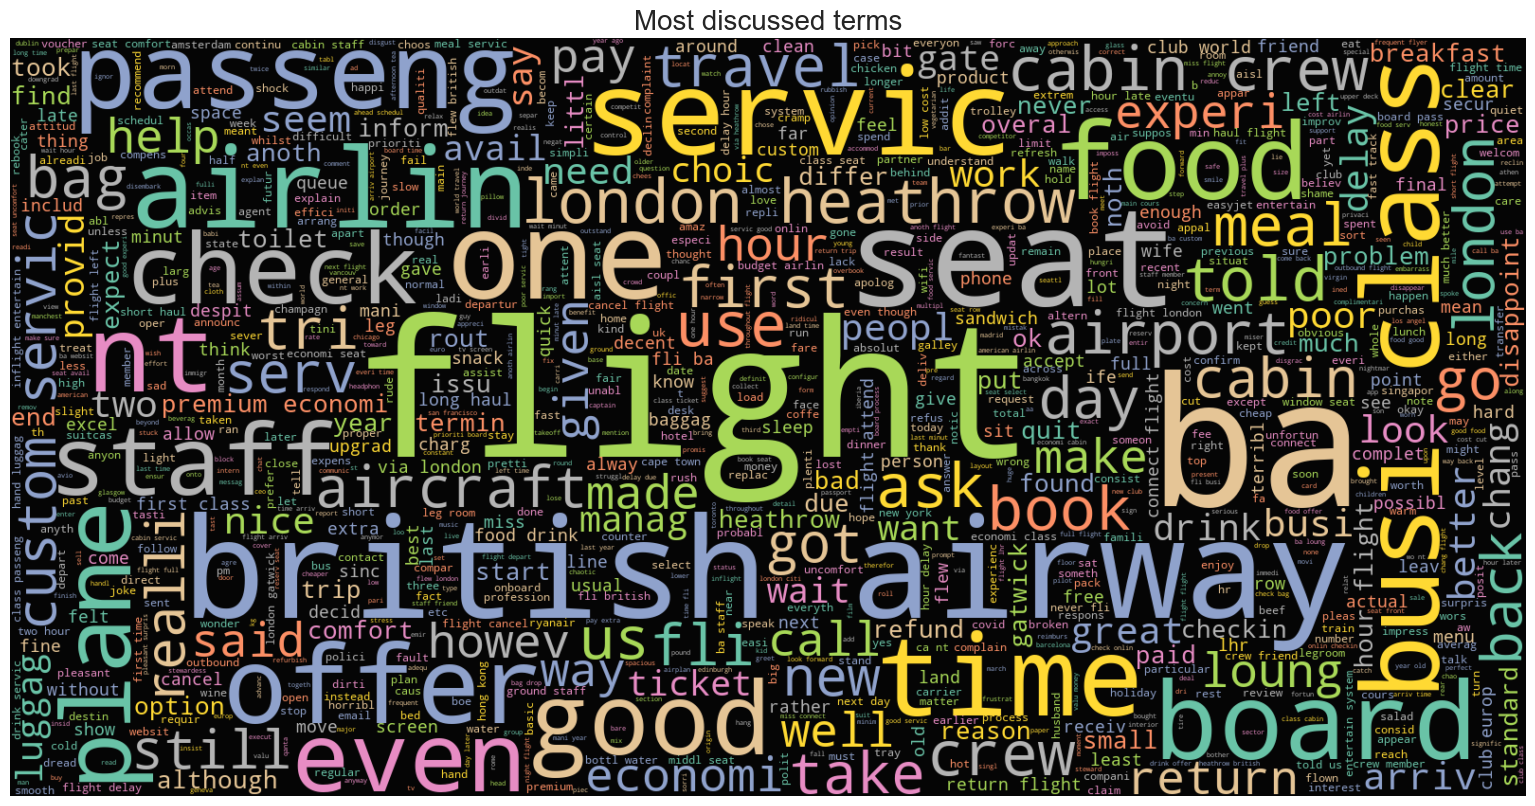

In [56]:
words=df['clean_text'].values
ls=[]
for i in words:
    ls.append(str(i))
plt.figure(figsize=(16,13))
wc=WordCloud(background_color='black',colormap='Set2',max_words=1000,max_font_size=200,width=1600,height=800)
wc.generate(" ".join(ls))
plt.title('Most discussed terms',fontsize=20)
plt.imshow(wc.recolor(colormap='Set2',random_state=17),alpha=0.98,interpolation='bilinear')
plt.tight_layout()
plt.savefig('Most_discussed_terms.png',bbox_inches='tight')
plt.axis('off')